Assignment 3

In [169]:
# load libraries
library('tidyverse')
library('forcats')

In [170]:
# get data
df = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv')

Parsed with column specification:
cols(
  .default = col_double(),
  EPISODE = col_character(),
  TITLE = col_character()
)
See spec(...) for full column specifications.


In [171]:
# preview data
head(df, n=10)


EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
S01E06,"""WINTER MOON""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
S01E07,"""AUTUMN MOUNTAINS""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
S01E08,"""PEACEFUL VALLEY""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
S01E09,"""SEASCAPE""",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [172]:
# make a copy of the df to work with
df2 = df

In [173]:
# pivot_longer
df3 = df2 %>%
        pivot_longer(-c(EPISODE,TITLE), names_to="subject", values_to="subject_count")

head(df3, n=20)

EPISODE,TITLE,subject,subject_count
<chr>,<chr>,<chr>,<dbl>
S01E01,"""A WALK IN THE WOODS""",APPLE_FRAME,0
S01E01,"""A WALK IN THE WOODS""",AURORA_BOREALIS,0
S01E01,"""A WALK IN THE WOODS""",BARN,0
S01E01,"""A WALK IN THE WOODS""",BEACH,0
S01E01,"""A WALK IN THE WOODS""",BOAT,0
S01E01,"""A WALK IN THE WOODS""",BRIDGE,0
S01E01,"""A WALK IN THE WOODS""",BUILDING,0
S01E01,"""A WALK IN THE WOODS""",BUSHES,1
S01E01,"""A WALK IN THE WOODS""",CABIN,0


In [174]:
# convert subject variable into a factor
df3 = mutate(df3, subject_factor=factor(df3$subject))

head(df3, n=10)

EPISODE,TITLE,subject,subject_count,subject_factor
<chr>,<chr>,<chr>,<dbl>,<fct>
S01E01,"""A WALK IN THE WOODS""",APPLE_FRAME,0,APPLE_FRAME
S01E01,"""A WALK IN THE WOODS""",AURORA_BOREALIS,0,AURORA_BOREALIS
S01E01,"""A WALK IN THE WOODS""",BARN,0,BARN
S01E01,"""A WALK IN THE WOODS""",BEACH,0,BEACH
S01E01,"""A WALK IN THE WOODS""",BOAT,0,BOAT
S01E01,"""A WALK IN THE WOODS""",BRIDGE,0,BRIDGE
S01E01,"""A WALK IN THE WOODS""",BUILDING,0,BUILDING
S01E01,"""A WALK IN THE WOODS""",BUSHES,1,BUSHES
S01E01,"""A WALK IN THE WOODS""",CABIN,0,CABIN


In [175]:
# group by subject and aggregate
df4 = df3 %>%  group_by(subject) %>%
            summarize(total=sum(subject_count))

head(df4)



subject,total
<chr>,<dbl>
APPLE_FRAME,1
AURORA_BOREALIS,2
BARN,17
BEACH,27
BOAT,2
BRIDGE,7


In [176]:
# make a copy to work with
df5 = df4



In [177]:
# add a column to make subject into a factor
df5 = mutate(df5, subject_factor=factor(df5$subject))

head(df5, n=10)

subject,total,subject_factor
<chr>,<dbl>,<fct>
APPLE_FRAME,1,APPLE_FRAME
AURORA_BOREALIS,2,AURORA_BOREALIS
BARN,17,BARN
BEACH,27,BEACH
BOAT,2,BOAT
BRIDGE,7,BRIDGE
BUILDING,1,BUILDING
BUSHES,120,BUSHES
CABIN,69,CABIN


In [178]:
# use forcats to find the top 10 in frequency and to lump the remaining values into a category "Other"
df6 = df5 %>%  mutate(name=fct_lump(subject_factor, w = total, n = 10))

head(df6, n=25)

subject,total,subject_factor,name
<chr>,<dbl>,<fct>,<fct>
APPLE_FRAME,1,APPLE_FRAME,Other
AURORA_BOREALIS,2,AURORA_BOREALIS,Other
BARN,17,BARN,Other
BEACH,27,BEACH,Other
BOAT,2,BOAT,Other
BRIDGE,7,BRIDGE,Other
BUILDING,1,BUILDING,Other
BUSHES,120,BUSHES,BUSHES
CABIN,69,CABIN,Other


In [179]:
# drop the subject and subject_factor variables
df6 = select (df6,-c(subject, subject_factor))

head(df6, n=15)

total,name
<dbl>,<fct>
1,Other
2,Other
17,Other
27,Other
2,Other
7,Other
1,Other
120,BUSHES
69,Other


In [180]:
# aggregate again to get counts for other
df7 = df6 %>%  group_by(name) %>%
            summarize(total=sum(total))

head(df7, n=15)


name,total
<fct>,<dbl>
BUSHES,120
CLOUDS,179
CONIFER,212
DECIDUOUS,227
GRASS,142
LAKE,143
MOUNTAIN,160
RIVER,126
TREE,361


In [181]:
# use fct_reorder to put the subjects in order
df7 %>%
   mutate(name = fct_reorder(name, total))

df7

name,total
<fct>,<dbl>
BUSHES,120
CLOUDS,179
CONIFER,212
DECIDUOUS,227
GRASS,142
LAKE,143
MOUNTAIN,160
RIVER,126
TREE,361


name,total
<fct>,<dbl>
BUSHES,120
CLOUDS,179
CONIFER,212
DECIDUOUS,227
GRASS,142
LAKE,143
MOUNTAIN,160
RIVER,126
TREE,361


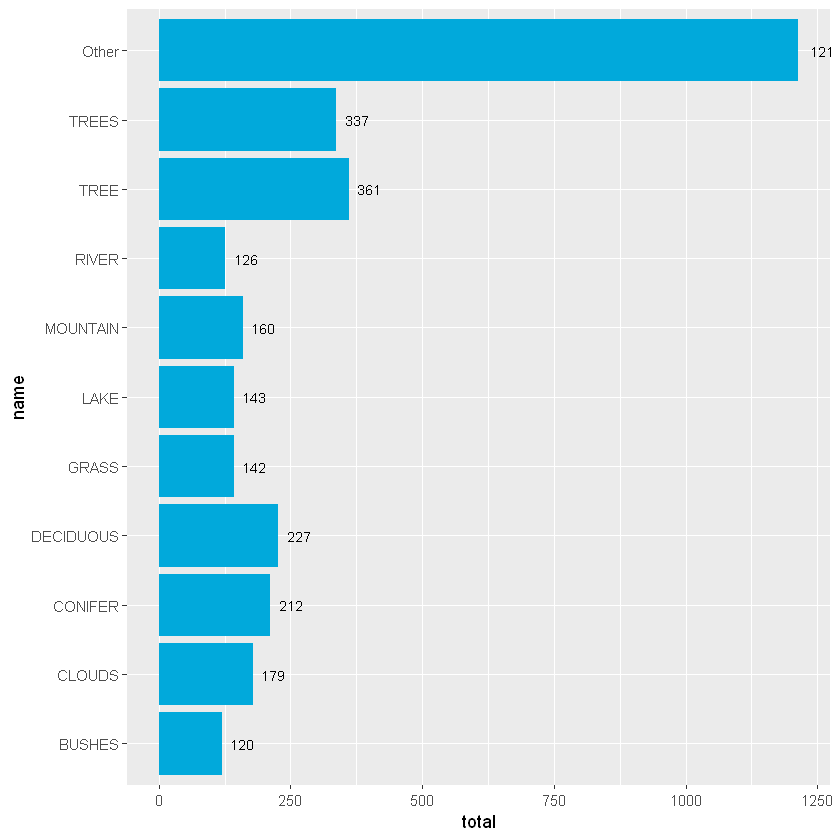

In [182]:
# create the plot

p = ggplot(df7, aes(name, total))
p = p + geom_bar(stat='identity', fill='#01A9DB')
p = p + coord_flip() + geom_text(label=df7$total, hjust=-0.35, size=3)
p

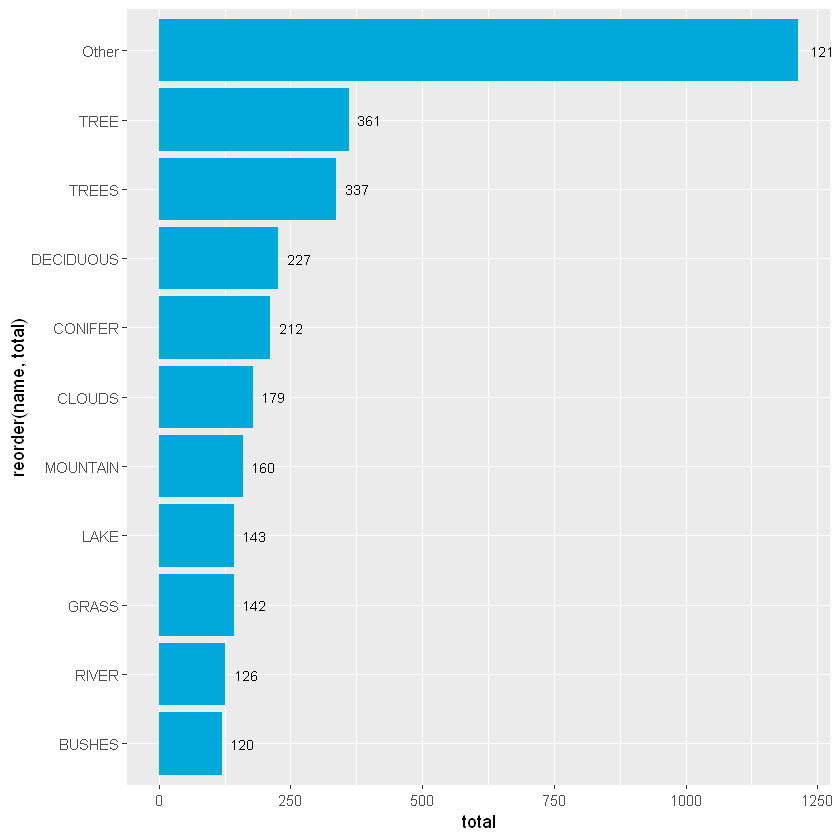

In [183]:
# fct_reorder didn't work, so reorder this way

p = ggplot(df7, aes(reorder(name, total), total))
p = p + geom_bar(stat='identity', fill='#01A9DB')
p = p + coord_flip() + geom_text(label=df7$total, hjust=-0.35, size=3)
p

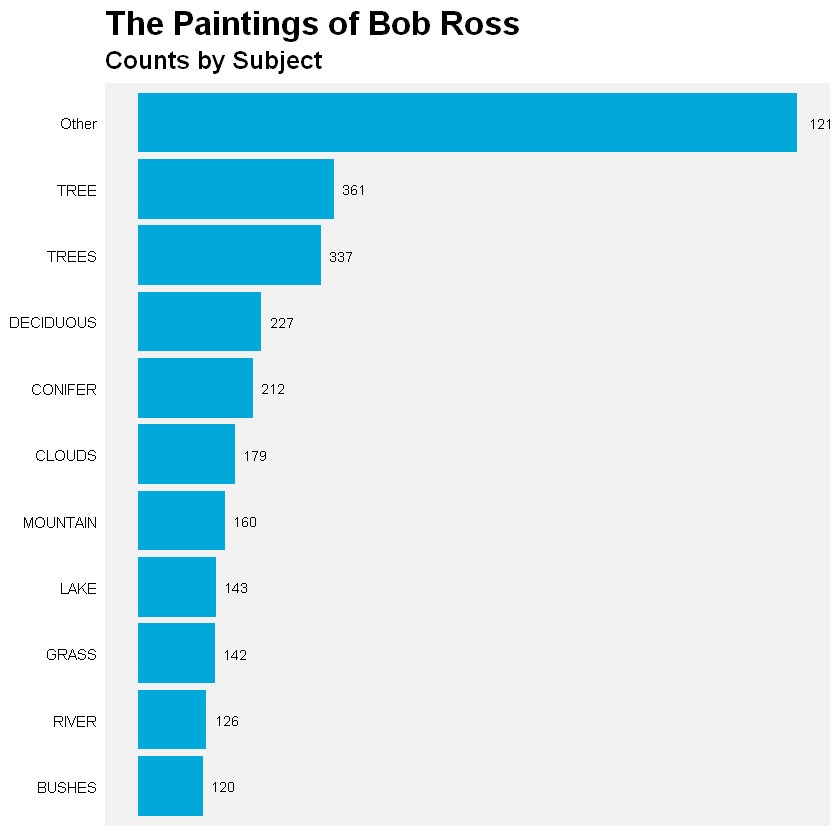

In [184]:
# improve the plot by adding title and adjusting other elements

p = p + ggtitle("The Paintings of Bob Ross", subtitle="Counts by Subject")
p = p + theme(plot.title=element_text(size=20, face="bold"),  
              plot.subtitle=element_text(size=15, face="bold"),
              axis.text.x=element_blank(),
              axis.text.y=element_text(color="black", size=9),
              axis.title.y=element_blank(),
              axis.title.x=element_blank(),
              axis.ticks=element_blank(),
              panel.grid.major=element_blank(),
              panel.grid.minor=element_blank(),
              panel.background=element_rect(fill="#F2F2F2"))
p

We are going to re-create a FiveThirtyEight analysis for this assignment.

The data can be found here:  

[https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv](https://github.com/fivethirtyeight/data/blob/master/bob-ross/elements-by-episode.csv)

Using the data, re-create this figure from the article:

<img src="https://fivethirtyeight.com/wp-content/uploads/2014/04/hickey-ross-tags-1.png" style="width: 500px" />

In your version of this figure,

1. **Don't worry about using the variable names exactly as in the article (_i.e._ just use the column names from the original data).**
1. **Plot counts instead of percentages.**
1. **Only show the top ten categories by count and group the remaining categories into a category named 'Other'.** 